In [ ]:
import random
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import MaxNLocator

# Algoritmo - Hallar secuencia con suma maxima

## Backtracking - Problema 3

Tenemos un array A de números enteros (positivos, negativos o cero) como el del Problema 2, no ordenado. Queremos encontrar la secuencia de uno o más elementos contiguos que sumen el máximo valor posible.
Desarrollar un algoritmo de Backtracking para encontrar dicha secuencia.

In [ ]:
def subsecuence_max_backtracking(num_array):
    # Manejo de caso borde: si el array está vacío, no hay subsecuencia.
    if not num_array:
        return 0, -1, -1

    array_lenght = len(num_array)

    max_suma_global = float('-inf') # Inicializamos con el valor más pequeño posible.
    mejor_inicio = -1
    mejor_fin = -1

    # 1. Backtracking - Nivel 1: Fijar el inicio de la subsecuencia
    # Probamos cada índice 'i' como un posible punto de partida.
    for i in range(array_lenght):
        suma_actual = 0

        # 2. Backtracking - Nivel 2: Extender la subsecuencia desde 'i'
        # A partir del 'i' fijado, exploramos todas las subsecuencias posibles
        # extendiendo el final 'j' hasta el final del array.
        for j in range(i, array_lenght):

            suma_actual += num_array[j]

            # Si la suma de la subsecuencia actual (de i a j) es la mejor
            # que hemos encontrado hasta ahora, la guardamos como la mejor solución.
            if suma_actual > max_suma_global:
                max_suma_global = suma_actual
                mejor_inicio = i
                mejor_fin = j

    return max_suma_global, mejor_inicio, mejor_fin

## Progrmación dinamica - Problema 4

Para el Problema 3, desarrollar un algoritmo de Programación Dinámica que encuentre la secuencia que sume el máximo valor posible

In [ ]:
def subsecuence_max_dynamic_programming(arr):
    if not arr:  # Manejar array vacío
        return 0, -1, -1

    # Inicialización con el primer elemento
    max_sum = arr[0]
    max_start = 0
    max_end = 0
    current_sum = arr[0]
    current_start = 0

    # Iterar desde el segundo elemento
    for i in range(1, len(arr)):
        # Decidir si empezar nuevo subarray o extender el actual
        if arr[i] > current_sum + arr[i]:
            current_sum = arr[i]
            current_start = i
        else:
            current_sum += arr[i]

        # Actualizar la solución global si encontramos una suma mayor
        if current_sum > max_sum:
            max_sum = current_sum
            max_start = current_start
            max_end = i

    # Extraer la secuencia óptima
    # max_sequence = arr[max_start:max_end + 1]

    return max_sum, max_start, max_end

#Pruebas

## Ejecución

Ejecucion sencilla

In [ ]:
def ejecutar_prueba(algoritmo, array):
  resultados = {'tamanio_array': [], 'tiempo_de_ejecucion': [], 'suma_maxima': [], 'secuencia_encontrada': []}

  t_inicio = time.time()
  suma_maxima, index_inicio, index_fin = algoritmo(array)
  t_fin = time.time()

  tiempo_de_ejecucion = t_fin - t_inicio

  # Extraer la secuencia óptima
  secuencia_encontrada = array[index_inicio:index_fin + 1]

  #print(f'Suma maxima: {suma_maxima}, secuencia: {secuencia_maxima}')
  print(f'Suma maxima: {suma_maxima}')
  print(f'{algoritmo} - Tamaño {len(array)}: Suma máxima = {suma_maxima}, '
    f'Tiempo = {tiempo_de_ejecucion:.6f} segundos')

  # Almaenar los resultados
  resultados['tamanio_array'].append(len(array))
  resultados['tiempo_de_ejecucion'].append(tiempo_de_ejecucion)
  resultados['suma_maxima'].append(suma_maxima)
  resultados['secuencia_encontrada'].append(secuencia_encontrada)

  return resultados

Ejecucion con multiples array con rangos anscendeste para tomar varios puntos en el grafico

In [ ]:
def ejecutar_prueba_requerida_por_informe(algoritmo, nombre_algoritmo, tamanio_maximo_del_array):
    # Tamaños de arrays para probar
    rangos = list(range(0, tamanio_maximo_del_array + 1, 5000))
    # rangos = [1000, 5000, 10000, 20000, 40000]  # Limitamos a 50000 por Backtracking
    resultados = {'tamanio_array': [], 'tiempo_de_ejecucion': [], 'suma_maxima': [], 'secuencia_encontrada': []}

    # Generar arrays aleatorios para cada tamaño
    random.seed(42)  # Para reproducibilidad
    for n in rangos:
        array = [random.randint(-100, 100) for _ in range(n)]

        t_inicio = time.time()
        suma_maxima, index_inicio, index_fin = algoritmo(array)
        t_fin = time.time()

        tiempo_de_ejecucion = t_fin - t_inicio
        secuencia_encontrada = array[index_inicio:index_fin + 1] if index_inicio != -1 else []

        print(f'{nombre_algoritmo} - Tamaño {n}: Suma máxima = {suma_maxima}, '
              f'Tiempo = {tiempo_de_ejecucion:.6f} segundos')

        resultados['tamanio_array'].append(n)
        resultados['tiempo_de_ejecucion'].append(tiempo_de_ejecucion)
        resultados['suma_maxima'].append(suma_maxima)
        resultados['secuencia_encontrada'].append(secuencia_encontrada)


    return resultados

## Tratamiento de datos

In [ ]:
def resultados_diccionario_a_dataframe(resultado):
    df = pd.DataFrame()
    df['tamanio_array'] = resultado['tamanio_array']
    df['tamanio_array_en_miles'] = (df['tamanio_array'] / 1000).astype(int)
    df['tiempo_de_ejecucion'] = resultado['tiempo_de_ejecucion']
    return df

## Graficar resultados

In [ ]:
def graficar_tiempos(df,
                     titulo='Tiempos de Ejecución',
                     guardar=None,
                     funcion_teorica=None,
                     label_teorica=None,
                     normalizar=True,
                     suavizar_teorica=True,
                     puntos=200):
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    from matplotlib.ticker import MaxNLocator

    sns.set_theme(style="whitegrid")
    x = df['tamanio_array']
    y = df['tiempo_de_ejecucion']

    plt.figure(figsize=(14, 6))
    sns.lineplot(x=x, y=y, marker='o', label='Práctico')

    if funcion_teorica:
        if suavizar_teorica:
            n = np.linspace(x.min(), x.max(), puntos)  # many points for smoothness
        else:
            n = df['tamanio_array'].values

        valores = funcion_teorica(n)

        if normalizar:
            factor = y.iloc[-1] / funcion_teorica(x.values)[-1]
            valores = valores * factor

        sns.lineplot(x=n, y=valores, linestyle='--', label=label_teorica)

    plt.title(titulo)
    plt.xlabel('Tamaño del Array')
    plt.ylabel('Tiempo de Ejecución (segundos)')
    plt.xticks(x)
    plt.grid(True)
    plt.legend()
    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(nbins=20))

    if guardar:
        plt.savefig(guardar, bbox_inches='tight')
        print(f"Gráfico guardado como {guardar}")

    plt.show()

# Ejecución de pruebas

## Backtracking

In [ ]:
resultado_backtracking = ejecutar_prueba_requerida_por_informe(subsecuence_max_backtracking, 'backtracking', 100000)

dataframe_backtracking = resultados_diccionario_a_dataframe(resultado_backtracking)

backtracking - Tamaño 0: Suma máxima = 0, Tiempo = 0.000002 segundos
backtracking - Tamaño 5000: Suma máxima = 10443, Tiempo = 0.957368 segundos
backtracking - Tamaño 10000: Suma máxima = 14150, Tiempo = 3.749397 segundos
backtracking - Tamaño 15000: Suma máxima = 8292, Tiempo = 9.613987 segundos
backtracking - Tamaño 20000: Suma máxima = 16282, Tiempo = 15.884037 segundos
backtracking - Tamaño 25000: Suma máxima = 11824, Tiempo = 26.083079 segundos
backtracking - Tamaño 30000: Suma máxima = 10145, Tiempo = 37.190171 segundos
backtracking - Tamaño 35000: Suma máxima = 18049, Tiempo = 51.901774 segundos
backtracking - Tamaño 40000: Suma máxima = 11139, Tiempo = 66.804682 segundos
backtracking - Tamaño 45000: Suma máxima = 21674, Tiempo = 85.791855 segundos
backtracking - Tamaño 50000: Suma máxima = 9451, Tiempo = 104.298462 segundos
backtracking - Tamaño 55000: Suma máxima = 16027, Tiempo = 128.547472 segundos
backtracking - Tamaño 60000: Suma máxima = 9960, Tiempo = 150.525165 segundos

In [ ]:
print(dataframe_backtracking)

    tamanio_array  tamanio_array_en_miles  tiempo_de_ejecucion
0               0                       0             0.000002
1            5000                       5             0.957368
2           10000                      10             3.749397
3           15000                      15             9.613987
4           20000                      20            15.884037
5           25000                      25            26.083079
6           30000                      30            37.190171
7           35000                      35            51.901774
8           40000                      40            66.804682
9           45000                      45            85.791855
10          50000                      50           104.298462
11          55000                      55           128.547472
12          60000                      60           150.525165
13          65000                      65           181.409610
14          70000                      70           205

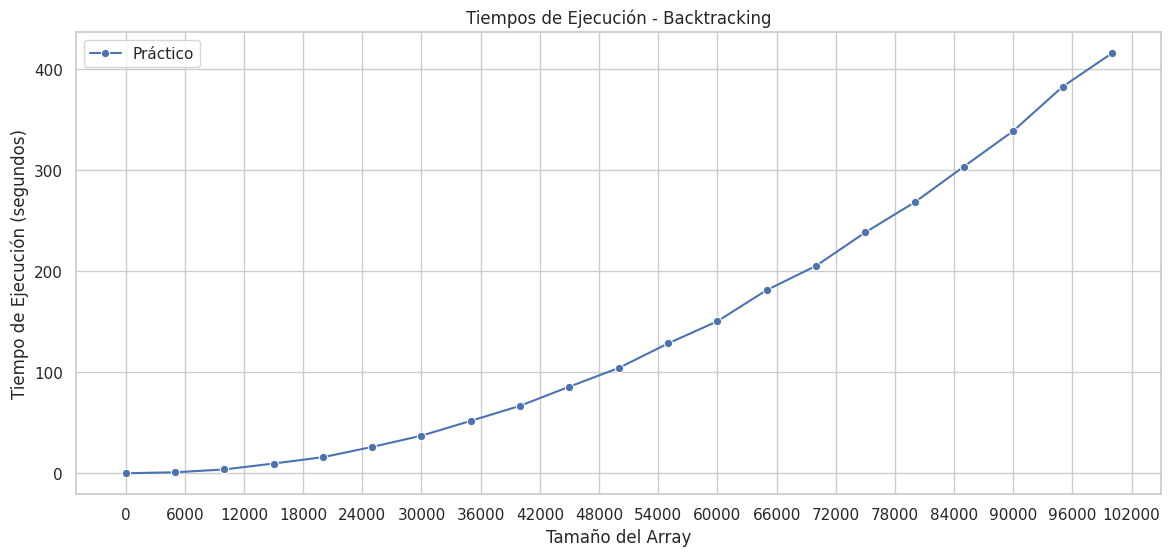

In [ ]:
# Graficar
graficar_tiempos(
    dataframe_backtracking,
    titulo='Tiempos de Ejecución - Backtracking'
)

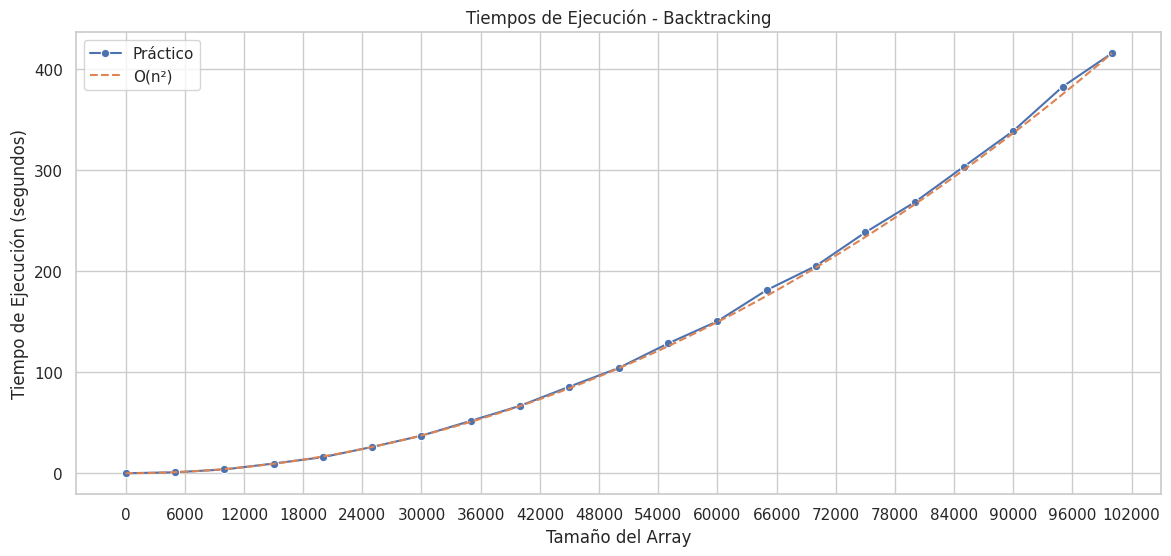

In [ ]:
# Definir función teórica
f_n2 = lambda n: n**(2)

# Graficar
graficar_tiempos(
    dataframe_backtracking,
    titulo='Tiempos de Ejecución - Backtracking',
    funcion_teorica=f_n2,
    label_teorica='O(n²)'
)

## Programación dinamica

In [ ]:
resultado_programacion_dinamica = ejecutar_prueba_requerida_por_informe(subsecuence_max_dynamic_programming, 'programacion dinamica', 100000)

dataframe_programacion_dinamica = resultados_diccionario_a_dataframe(resultado_programacion_dinamica)

programacion dinamica - Tamaño 0: Suma máxima = 0, Tiempo = 0.000002 segundos
programacion dinamica - Tamaño 5000: Suma máxima = 10443, Tiempo = 0.000624 segundos
programacion dinamica - Tamaño 10000: Suma máxima = 14150, Tiempo = 0.001690 segundos
programacion dinamica - Tamaño 15000: Suma máxima = 8292, Tiempo = 0.002230 segundos
programacion dinamica - Tamaño 20000: Suma máxima = 16282, Tiempo = 0.002330 segundos
programacion dinamica - Tamaño 25000: Suma máxima = 11824, Tiempo = 0.002960 segundos
programacion dinamica - Tamaño 30000: Suma máxima = 10145, Tiempo = 0.003518 segundos
programacion dinamica - Tamaño 35000: Suma máxima = 18049, Tiempo = 0.004184 segundos
programacion dinamica - Tamaño 40000: Suma máxima = 11139, Tiempo = 0.004602 segundos
programacion dinamica - Tamaño 45000: Suma máxima = 21674, Tiempo = 0.005281 segundos
programacion dinamica - Tamaño 50000: Suma máxima = 9451, Tiempo = 0.005838 segundos
programacion dinamica - Tamaño 55000: Suma máxima = 16027, Tiempo

In [ ]:
print(dataframe_programacion_dinamica)

    tamanio_array  tamanio_array_en_miles  tiempo_de_ejecucion
0               0                       0             0.000001
1            5000                       5             0.000621
2           10000                      10             0.001732
3           15000                      15             0.003132
4           20000                      20             0.002613
5           25000                      25             0.003101
6           30000                      30             0.003611
7           35000                      35             0.007671
8           40000                      40             0.004756
9           45000                      45             0.005519
10          50000                      50             0.006008
11          55000                      55             0.006929
12          60000                      60             0.007623
13          65000                      65             0.007881
14          70000                      70             0

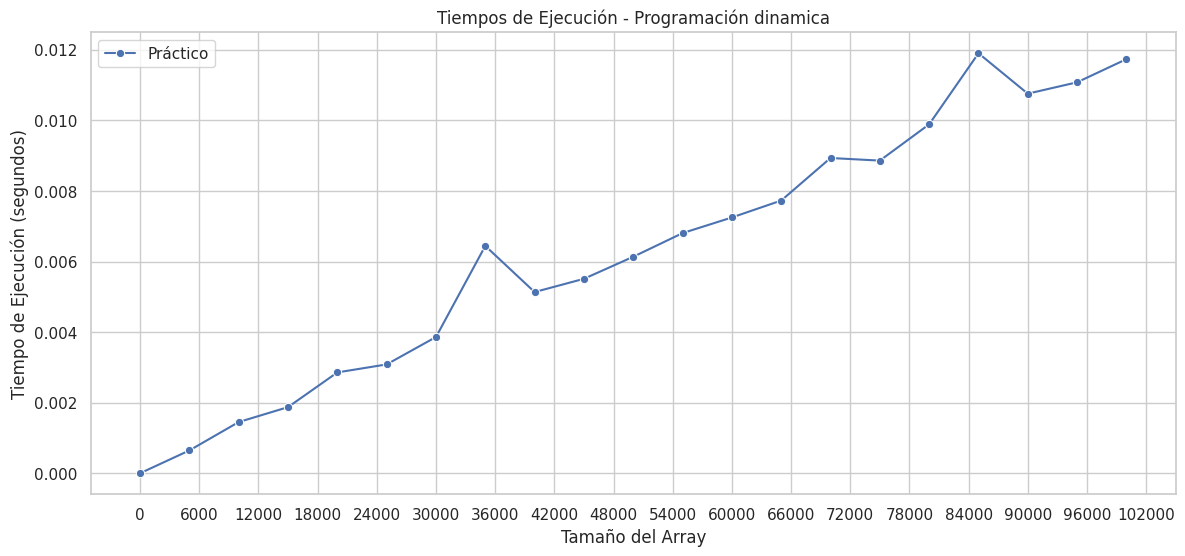

In [ ]:
# Graficar
graficar_tiempos(
    dataframe_programacion_dinamica,
    titulo='Tiempos de Ejecución - Programación dinamica'
)

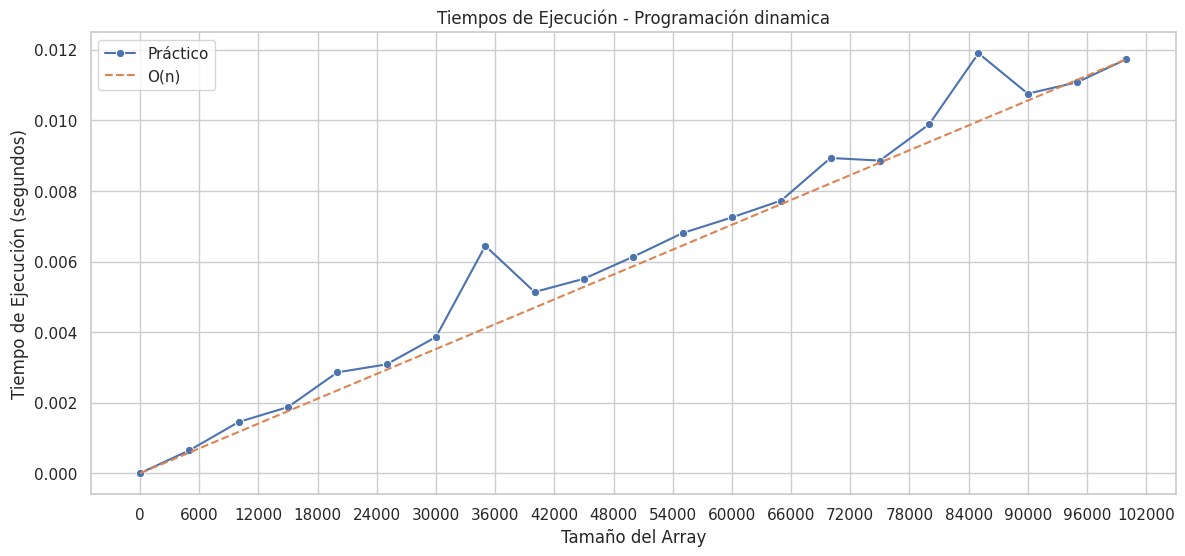

In [ ]:
# Definir función teórica
f_n = lambda n: n

# Graficar
graficar_tiempos(
    dataframe_programacion_dinamica,
    titulo='Tiempos de Ejecución - Programación dinamica',
    funcion_teorica=f_n,
    label_teorica='O(n)'
)

### Multiples iteraciones, tiempo promedio

teramos múltiples veces y calculamos el promedio del tiempo de ejecución para cada tamaño de entrada. De esta manera reducimos las variaciones debidas a factores externos —como la carga del sistema operativo, procesos en segundo plano o pequeñas fluctuaciones en el hardware— y obtenemos una curva más representativa de la complejidad algorítmica real.

In [ ]:
iteraciones = 100

# Diccionario para acumular
dic_tiempos_de_ejecucion = {}

for _ in range(iteraciones):
    resultado = ejecutar_prueba_requerida_por_informe(
        subsecuence_max_dynamic_programming,
        'programacion dinamica',
        100000
    )
    for i, element in enumerate(resultado['tamanio_array']):
        dic_tiempos_de_ejecucion[element] = dic_tiempos_de_ejecucion.get(element, 0) + resultado['tiempo_de_ejecucion'][i]

# Calcular promedio
for key in dic_tiempos_de_ejecucion:
    dic_tiempos_de_ejecucion[key] /= iteraciones

programacion dinamica - Tamaño 0: Suma máxima = 0, Tiempo = 0.000002 segundos
programacion dinamica - Tamaño 5000: Suma máxima = 10443, Tiempo = 0.002495 segundos
programacion dinamica - Tamaño 10000: Suma máxima = 14150, Tiempo = 0.002125 segundos
programacion dinamica - Tamaño 15000: Suma máxima = 8292, Tiempo = 0.001987 segundos
programacion dinamica - Tamaño 20000: Suma máxima = 16282, Tiempo = 0.002486 segundos
programacion dinamica - Tamaño 25000: Suma máxima = 11824, Tiempo = 0.002976 segundos
programacion dinamica - Tamaño 30000: Suma máxima = 10145, Tiempo = 0.003617 segundos
programacion dinamica - Tamaño 35000: Suma máxima = 18049, Tiempo = 0.004191 segundos
programacion dinamica - Tamaño 40000: Suma máxima = 11139, Tiempo = 0.004980 segundos
programacion dinamica - Tamaño 45000: Suma máxima = 21674, Tiempo = 0.005399 segundos
programacion dinamica - Tamaño 50000: Suma máxima = 9451, Tiempo = 0.005987 segundos
programacion dinamica - Tamaño 55000: Suma máxima = 16027, Tiempo

In [ ]:
print(iteraciones)

100


In [ ]:
resultado_programacion_dinamica_promediado = {'tamanio_array': [], 'tiempo_de_ejecucion': []}
for key, value in dic_tiempos_de_ejecucion.items():
  resultado_programacion_dinamica_promediado['tamanio_array'].append(key)
  resultado_programacion_dinamica_promediado['tiempo_de_ejecucion'].append(value)

dataframe_programacion_dinamica_promediado = resultados_diccionario_a_dataframe(resultado_programacion_dinamica_promediado)

In [ ]:
print(dataframe_programacion_dinamica_promediado)

    tamanio_array  tamanio_array_en_miles  tiempo_de_ejecucion
0               0                       0             0.000002
1            5000                       5             0.000668
2           10000                      10             0.001372
3           15000                      15             0.002074
4           20000                      20             0.002759
5           25000                      25             0.003504
6           30000                      30             0.004169
7           35000                      35             0.005005
8           40000                      40             0.005542
9           45000                      45             0.006244
10          50000                      50             0.007026
11          55000                      55             0.007663
12          60000                      60             0.008170
13          65000                      65             0.009161
14          70000                      70             0

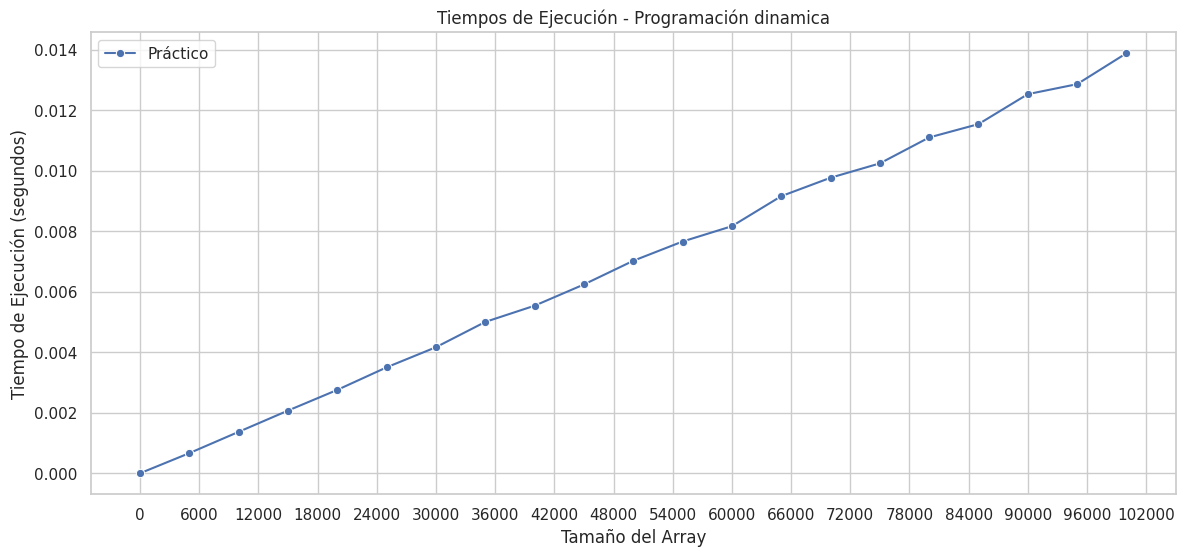

In [ ]:
# Graficar
graficar_tiempos(
    dataframe_programacion_dinamica_promediado,
    titulo='Tiempos de Ejecución - Programación dinamica'
)

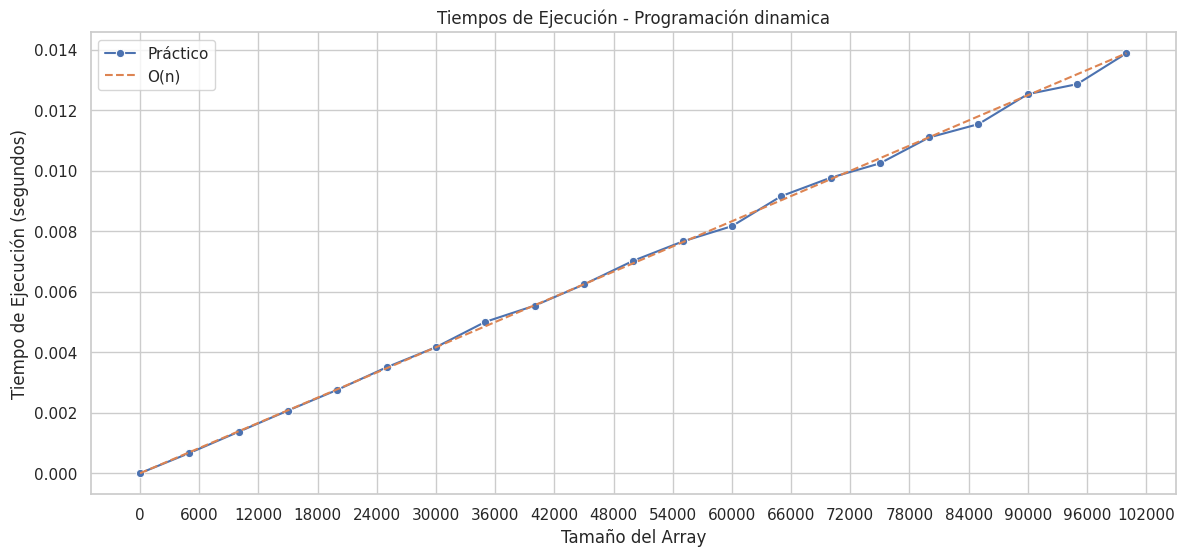

In [ ]:
# Definir función teórica
f_n = lambda n: n

# Graficar
graficar_tiempos(
    dataframe_programacion_dinamica_promediado,
    titulo='Tiempos de Ejecución - Programación dinamica',
    funcion_teorica=f_n,
    label_teorica='O(n)'
)

# Grafico Backtracking vs Dinamica

In [ ]:
def graficar_tiempos_multiple(
    dfs,
    labels,
    titulo='Comparación de Tiempos de Ejecución',
    guardar=None,
    funciones_teoricas=None,
    labels_teoricas=None,
    normalizar=True,
    suavizar_teorica=True,
    puntos=200
):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(14, 6))

    # Graficar curvas prácticas
    for df, label in zip(dfs, labels):
        x = df['tamanio_array']
        y = df['tiempo_de_ejecucion']
        sns.lineplot(x=x, y=y, marker='o', label=label)

    # Graficar curvas teóricas (si se pasan)
    if funciones_teoricas and labels_teoricas:
        for funcion, label, df in zip(funciones_teoricas, labels_teoricas, dfs):
            x = df['tamanio_array']
            y = df['tiempo_de_ejecucion']

            if suavizar_teorica:
                n = np.linspace(x.min(), x.max(), puntos)
            else:
                n = x.values

            valores = funcion(n)

            if normalizar:
                factor = y.iloc[-1] / funcion(x.values)[-1]
                valores = valores * factor

            sns.lineplot(x=n, y=valores, linestyle='--', label=label)

    plt.title(titulo)
    plt.xlabel('Tamaño del Array')
    plt.ylabel('Tiempo de Ejecución (segundos)')
    plt.grid(True)
    plt.legend()
    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(nbins=20))

    if guardar:
        plt.savefig(guardar, bbox_inches='tight')
        print(f"Gráfico guardado como {guardar}")

    plt.show()


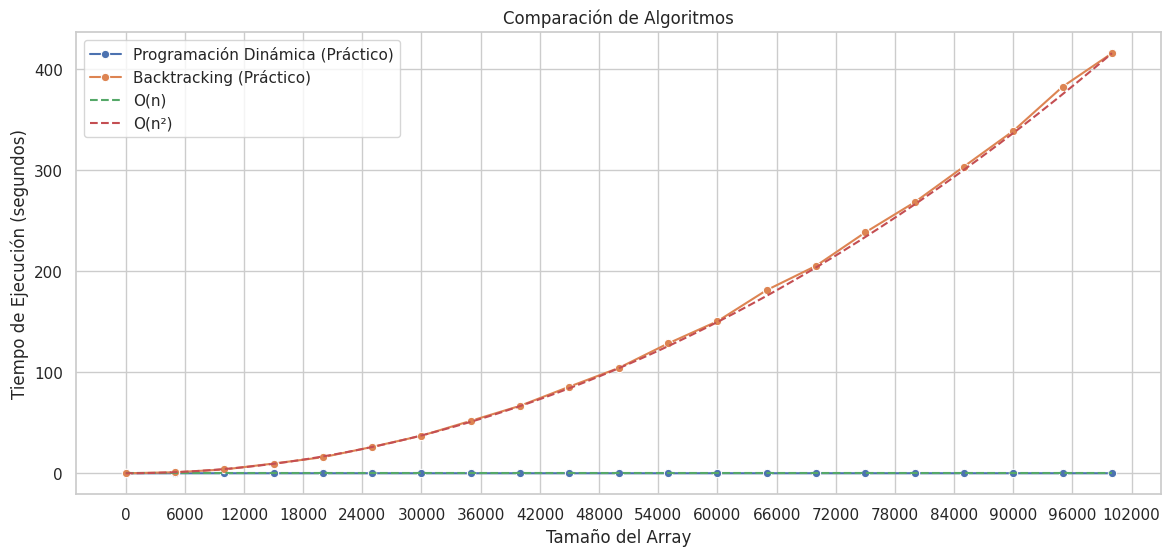

In [18]:
# Define theoretical functions
f_n = lambda n: n
f_n2 = lambda n: n**2

graficar_tiempos_multiple(
    dfs=[dataframe_programacion_dinamica_promediado, dataframe_backtracking],
    labels=["Programación Dinámica (Práctico)", "Backtracking (Práctico)"],
    funciones_teoricas=[f_n, f_n2],
    labels_teoricas=["O(n)", "O(n²)"],
    titulo="Comparación de Algoritmos"
)